# **<font color="red">DIABETES PREDICTION</font>**

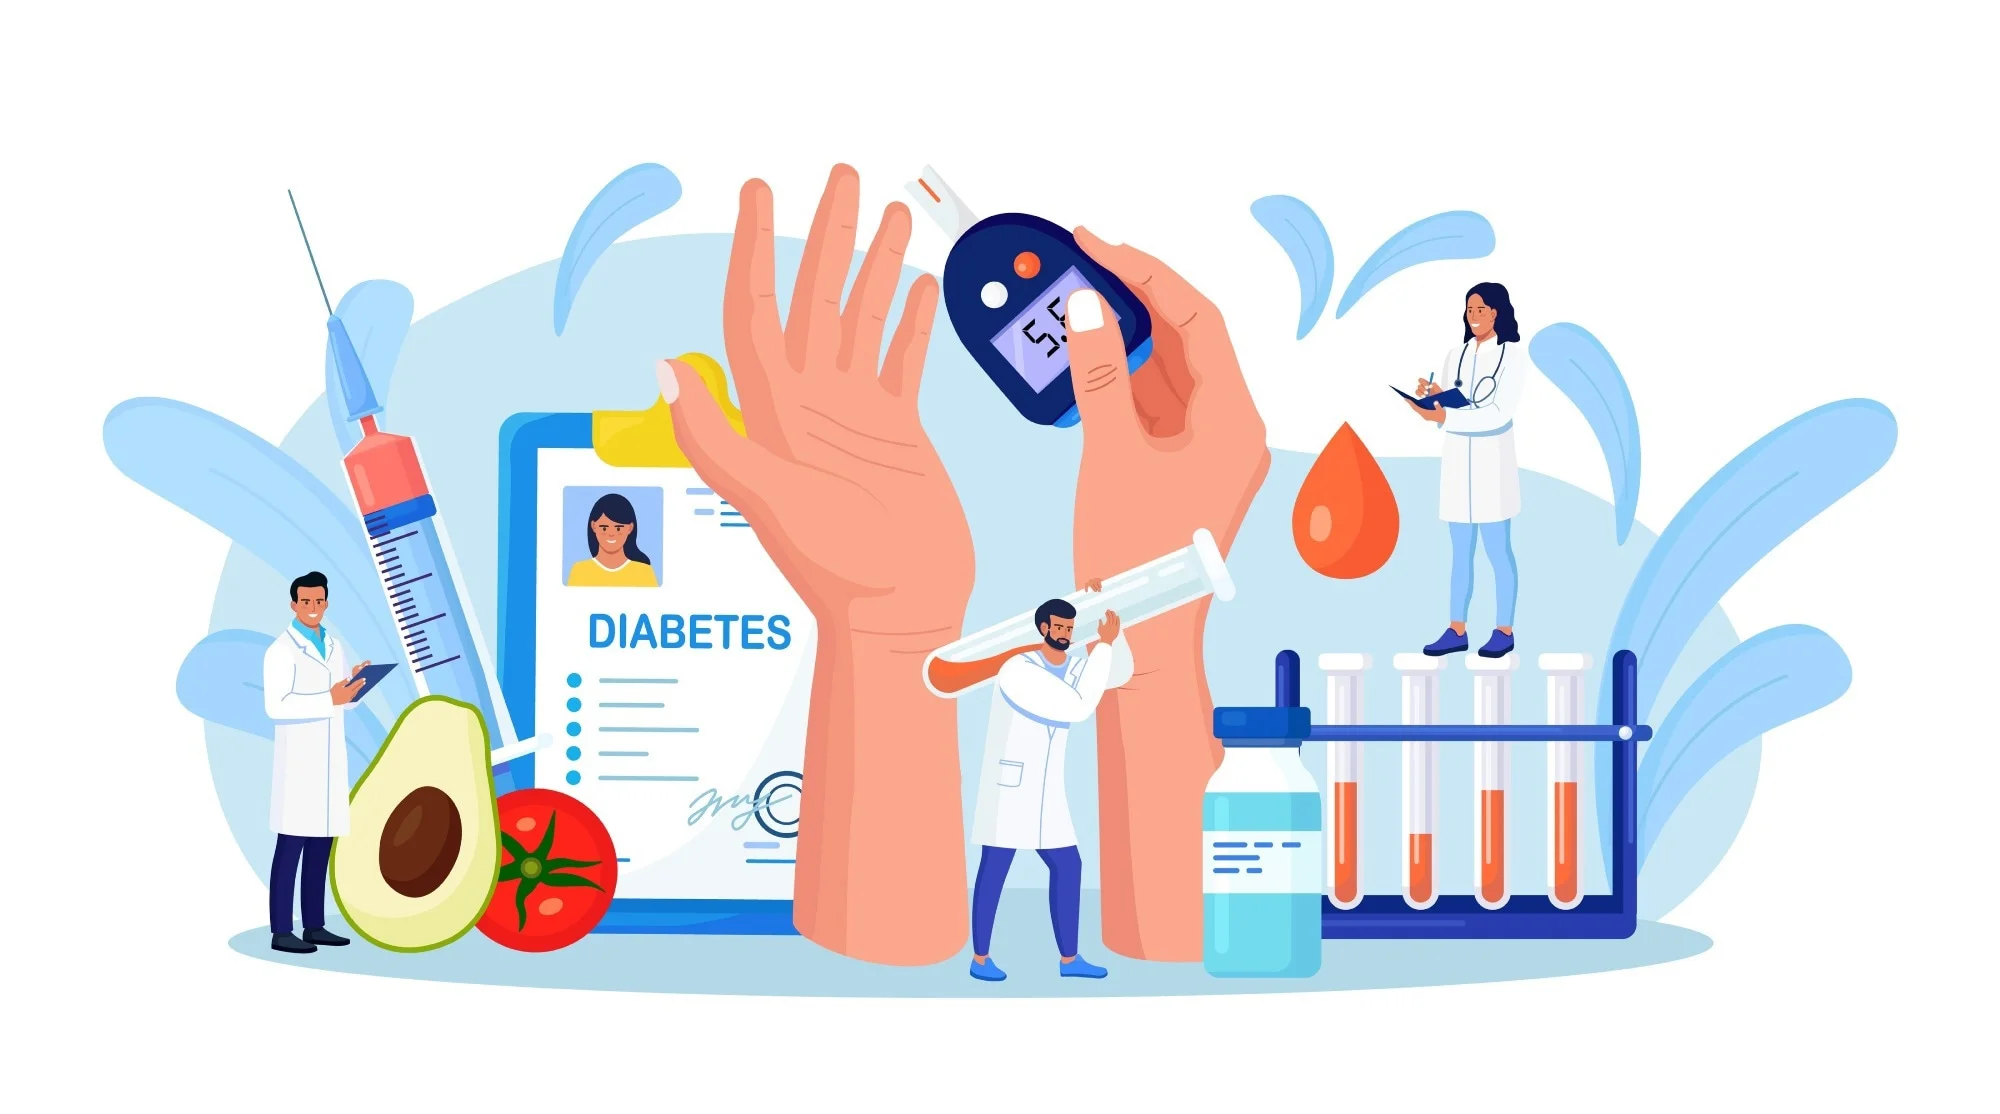




*   The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative).    
*   The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

*  This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.
*   This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.


*   Dataset:-https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset




**import libraries**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
import pickle

import warnings
warnings.filterwarnings('ignore')


**Read Data**

In [45]:
df=pd.read_csv('/content/drive/MyDrive/CognoRiseInfoTech/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [96]:
df['hypertension'].value_counts()

hypertension
0    88667
1     7461
Name: count, dtype: int64

**check basic information**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


check shape

In [47]:
df.shape

(100000, 9)

In [48]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [49]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


**Check Missing Values**

In [50]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Check Datatype**

In [51]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

**check duplicate values**

In [52]:
df.duplicated().sum()

3854

**remove duplicate values**

In [53]:
df=df.drop_duplicates()
df.shape

(96146, 9)

**counts of unique values in the smoking history**

In [54]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

**counts of unique values in the gender**

In [55]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [56]:
df=df[df['gender']!='Other']

In [57]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

**Encode Data**

In [58]:
encoder=LabelEncoder()
encoder1=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df['smoking_history']=encoder1.fit_transform(df['smoking_history'])

In [59]:
mapp=list(zip(encoder.classes_,encoder.transform(encoder.classes_)))
mapp

[('Female', 0), ('Male', 1)]

In [60]:
mapp1=list(zip(encoder1.classes_,encoder1.transform(encoder1.classes_)))
mapp1

[('No Info', 0),
 ('current', 1),
 ('ever', 2),
 ('former', 3),
 ('never', 4),
 ('not current', 5)]

**Count of individuals with and without diabetes**

In [61]:
df['diabetes'].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

**Correlation Matrix**

In [62]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028670,0.014196,0.078512,-0.079574,-0.023490,0.019928,0.017831,0.037837
age,-0.028670,1.000000,0.257297,0.238449,0.241234,0.344779,0.106708,0.114323,0.264918
hypertension,0.014196,0.257297,1.000000,0.119972,0.087928,0.148124,0.081443,0.084841,0.195696
heart_disease,0.078512,0.238449,0.119972,1.000000,0.023627,0.061382,0.068142,0.070838,0.170701
smoking_history,-0.079574,0.241234,0.087928,0.023627,1.000000,0.183883,0.035458,0.038329,0.088509
bmi,-0.023490,0.344779,0.148124,0.061382,0.183883,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.019928,0.106708,0.081443,0.068142,0.035458,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.017831,0.114323,0.084841,0.070838,0.038329,0.092593,0.171717,1.000000,0.424366
diabetes,0.037837,0.264918,0.195696,0.170701,0.088509,0.214951,0.406446,0.424366,1.000000


<Axes: >

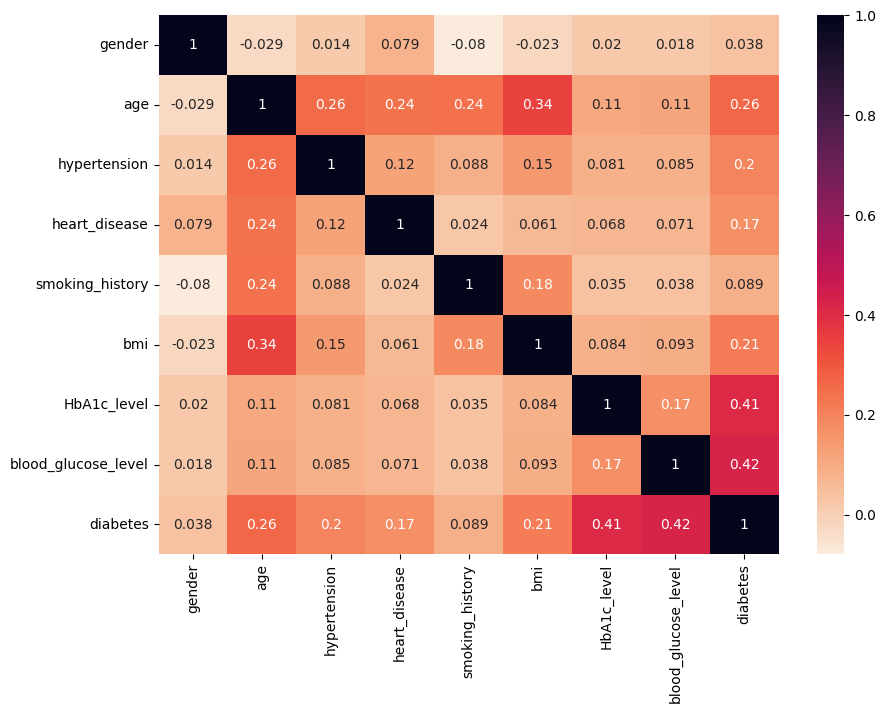

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="rocket_r")

**Histogram for age**

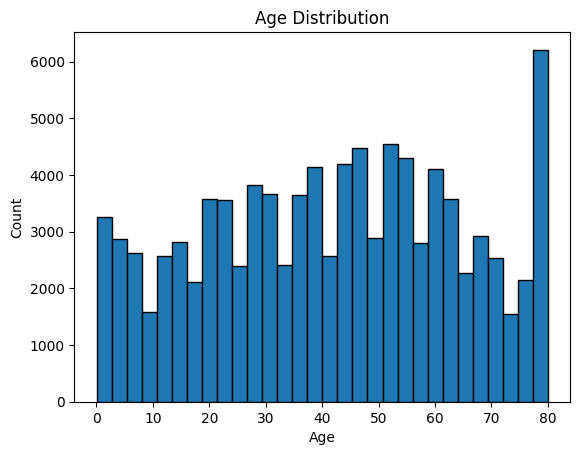

In [64]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Counts Plot**

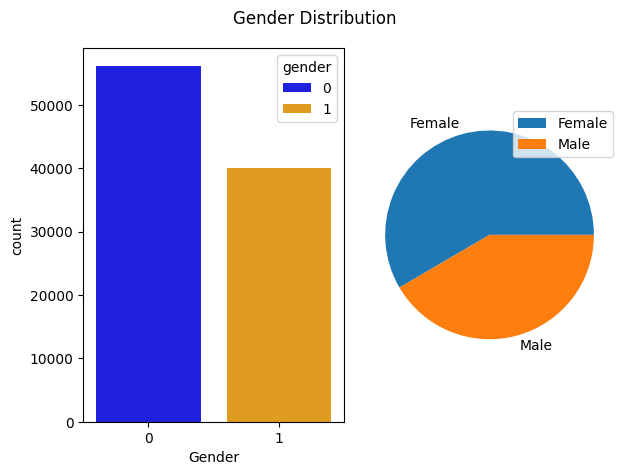

In [65]:
plt.subplot(1,2,1)
sns.countplot(x='gender',data=df,palette=['blue', 'orange'],hue='gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.suptitle('Gender Distribution')

plt.subplot(1,2,2)
plt.pie(df['gender'].value_counts(),labels=['Female','Male'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Distribution plot for BMI**

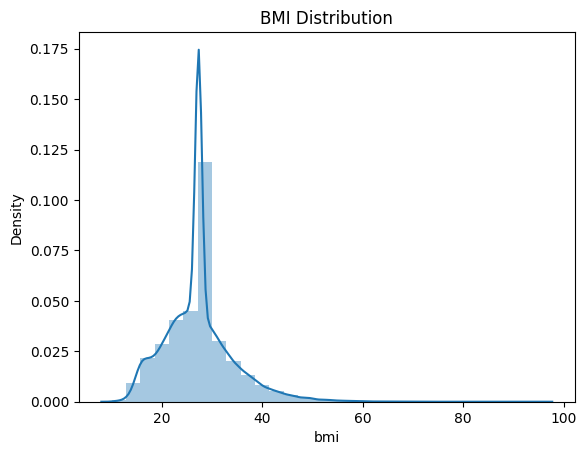

In [66]:
sns.distplot(df['bmi'],bins=30)
plt.title('BMI Distribution')
plt.show()

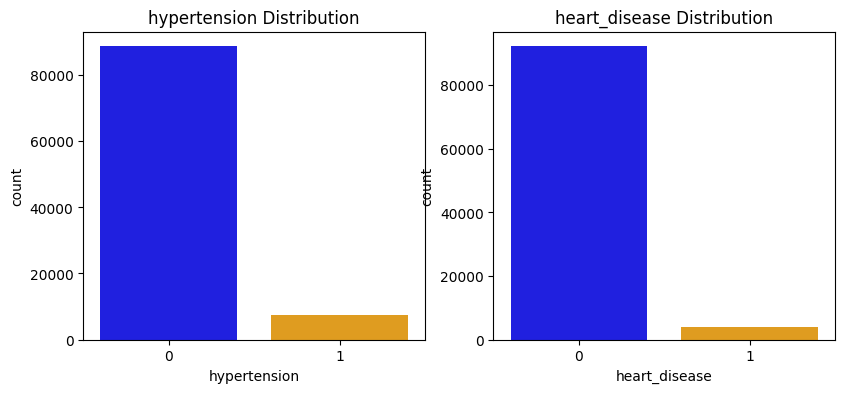

In [67]:
l=['hypertension', 'heart_disease']
plt.figure(figsize=(15,4))
for j in range(len(l)):
    plt.subplot(1, 3, j + 1)
    sns.countplot(x=l[j], data=df, palette=['blue', 'orange'])
    plt.title(f'{l[j]} Distribution')

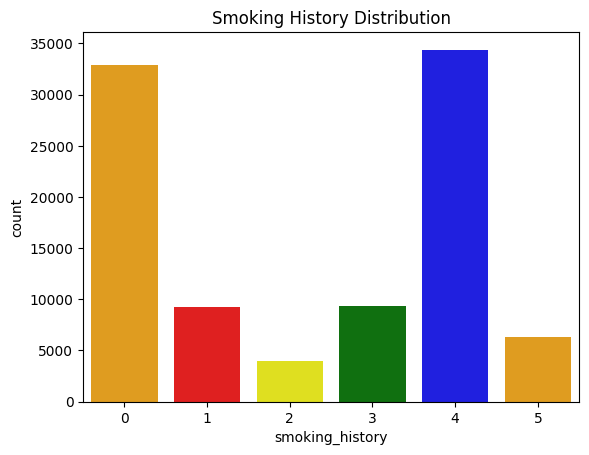

In [68]:
sns.countplot(x='smoking_history', data=df,palette=['orange','red','yellow','green','blue'])
plt.title('Smoking History Distribution')
plt.show()

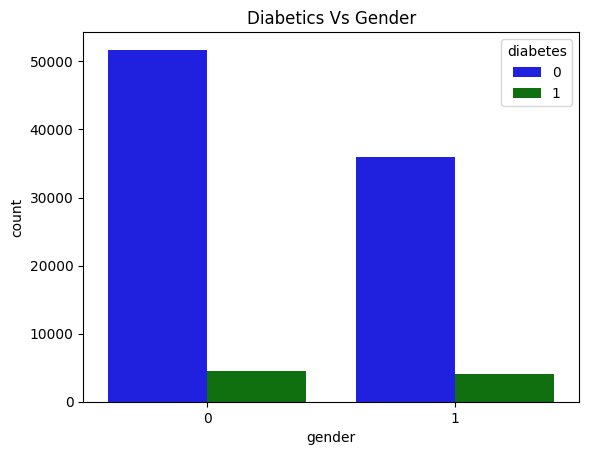

In [69]:
sns.countplot(x='gender',hue='diabetes',data=df,palette=['blue','green'])
plt.title('Diabetics Vs Gender')
plt.show()

**Scatterplot Age vs BMI colored by Diabetes classification**

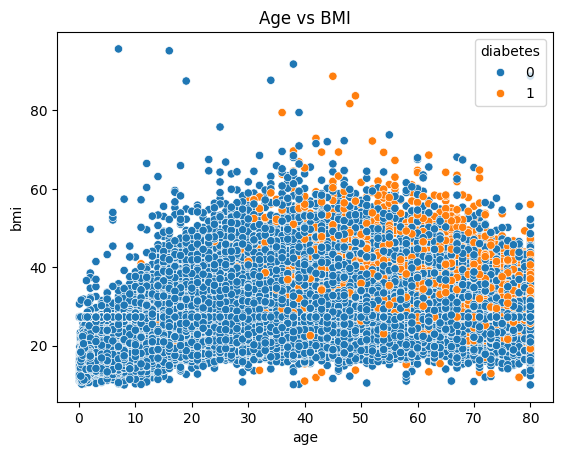

In [70]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

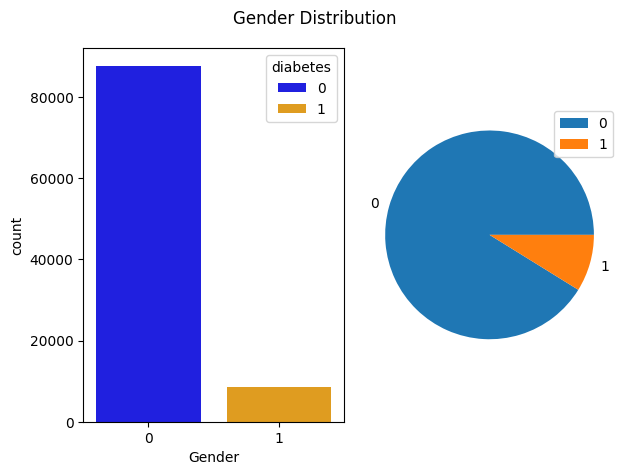

In [71]:
plt.subplot(1,2,1)
sns.countplot(x='diabetes',data=df,palette=['blue', 'orange'],hue='diabetes')
plt.xlabel('Gender')
plt.ylabel('count')
plt.suptitle('Gender Distribution')

plt.subplot(1,2,2)
plt.pie(df['diabetes'].value_counts(),labels=[0,1])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**The dataset is imbalanced dataset. it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.**

In [72]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


**separate dependent and independent variables**

In [73]:
X=df.iloc[:,:-1]
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [74]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96128, dtype: int64

In [75]:
y.value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

**Oversampling**

In [76]:
over=SMOTE(random_state=1)
X,y=over.fit_resample(X,y)


In [77]:
y.value_counts()

diabetes
0    87646
1    87646
Name: count, dtype: int64

**Standardizing the features**

In [78]:
m=MinMaxScaler()
X=m.fit_transform(X)
X

array([[0.        , 1.        , 0.        , ..., 0.17717087, 0.56363636,
        0.27272727],
       [0.        , 0.67467467, 0.        , ..., 0.20203081, 0.56363636,
        0.        ],
       [1.        , 0.34934935, 0.        , ..., 0.20203081, 0.4       ,
        0.35454545],
       ...,
       [0.        , 0.8755913 , 0.        , ..., 0.13201018, 0.41974337,
        0.22727273],
       [0.        , 0.63720636, 0.        , ..., 0.48027738, 0.63661512,
        0.22727273],
       [0.        , 0.75071242, 0.        , ..., 0.51447312, 0.41678298,
        0.35909091]])

**Splitting the data into training and testing sets**

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
X_train.shape,X_test.shape

((122704, 8), (52588, 8))

In [81]:
y_train.shape,y_test.shape

((122704,), (52588,))

**Model Building**

               KNeighborsClassifier()
**************************************************************
accuracy= 92.75690271544839
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     26406
           1       0.91      0.95      0.93     26182

    accuracy                           0.93     52588
   macro avg       0.93      0.93      0.93     52588
weighted avg       0.93      0.93      0.93     52588



               RandomForestClassifier(random_state=1)
**************************************************************
accuracy= 97.19327603255495
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26406
           1       0.97      0.97      0.97     26182

    accuracy                           0.97     52588
   macro avg       0.97      0.97      0.97     52588
weighted avg       0.97      0.97      0.97     52588



               DecisionTreeClassifier(random_state=1)
**************

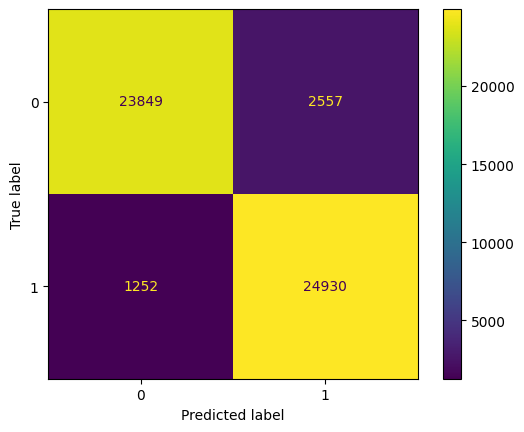

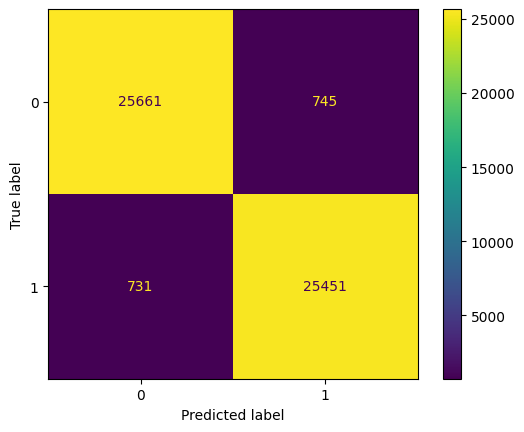

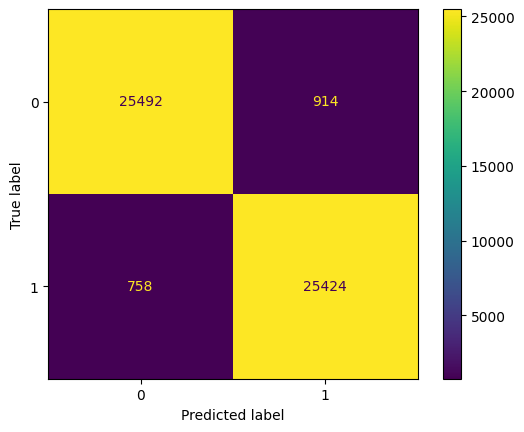

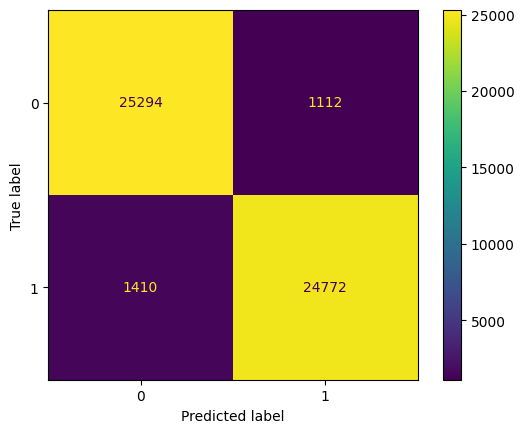

In [82]:
k=KNeighborsClassifier(n_neighbors=5)
r=RandomForestClassifier(n_estimators=100,random_state=1)
d=DecisionTreeClassifier(random_state=1)
a=AdaBoostClassifier(random_state=1)

model=[k,r,d,a]

for i in model:
  print( '              ',i        )
  print('**************************************************************')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('accuracy=',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()
  print()


**"The RandomForestClassifier achieved high accuracy of 97%, so we will use this model for deployment."**

In [83]:
R=RandomForestClassifier(n_estimators=100,random_state=1)
R.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [84]:
y_pred_r=R.predict(X_test)
y_pred_r

array([0, 0, 1, ..., 1, 0, 1])

accuracy= 97.19327603255495
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26406
           1       0.97      0.97      0.97     26182

    accuracy                           0.97     52588
   macro avg       0.97      0.97      0.97     52588
weighted avg       0.97      0.97      0.97     52588



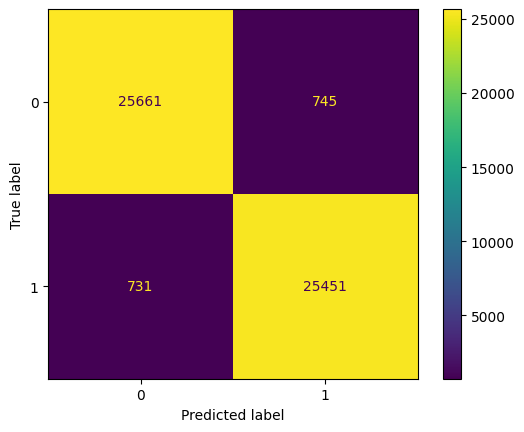

In [85]:
print('accuracy=',accuracy_score(y_test,y_pred_r)*100)
print(classification_report(y_test,y_pred_r))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_r))

In [94]:
y_new=R.predict(m.transform([[0,80.0,0,1,4,25.19,6.6,140]]))
if y_new==0:
  print('No Diabetes')
else:
  print('Diabetes')


No Diabetes


**Save Model**

In [95]:
pickle.dump(R,open('diabetes_model.save','wb'))
pickle.dump(m,open('diabetes_scaler.save','wb'))
pickle.dump(encoder,open('diabetics_encoder.save','wb'))
pickle.dump(encoder1,open('diabetics_encoder1.save','wb'))